In [32]:
%pip install tensorflow-addons


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
    --------------------------------------- 10.2/719.8 kB ? eta -:--:--
   -- ------------------------------------ 41.0/719.8 kB 495.5 kB/s eta 0:00:02
   ------ --------------------------------- 122.9/719.8 kB 1.0 MB/s eta 0:00:01
   ------------ --------------------------- 225.3/719.8 kB 1.4 MB/s eta 0:00:01
   ----------------- ---------------------- 307.2/719.8 kB 1.6 MB/s eta 0:00:01
   --------------------- ------------------ 389.1/719.8 kB 1.5 MB/s eta 0:00:01
   ----------------------------- ---------- 532.5/719.8 kB 1.8 MB/s eta 0:00:01
   -------------------------------------- - 686.1/719.8 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 719.8/719.8 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# load model 
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
import pickle
import random
import pandas as pd
import tensorflow as tf


In [2]:
with open('german-traffic-signs/train.p','rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
    test_data = pickle.load(f)

In [3]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [4]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"

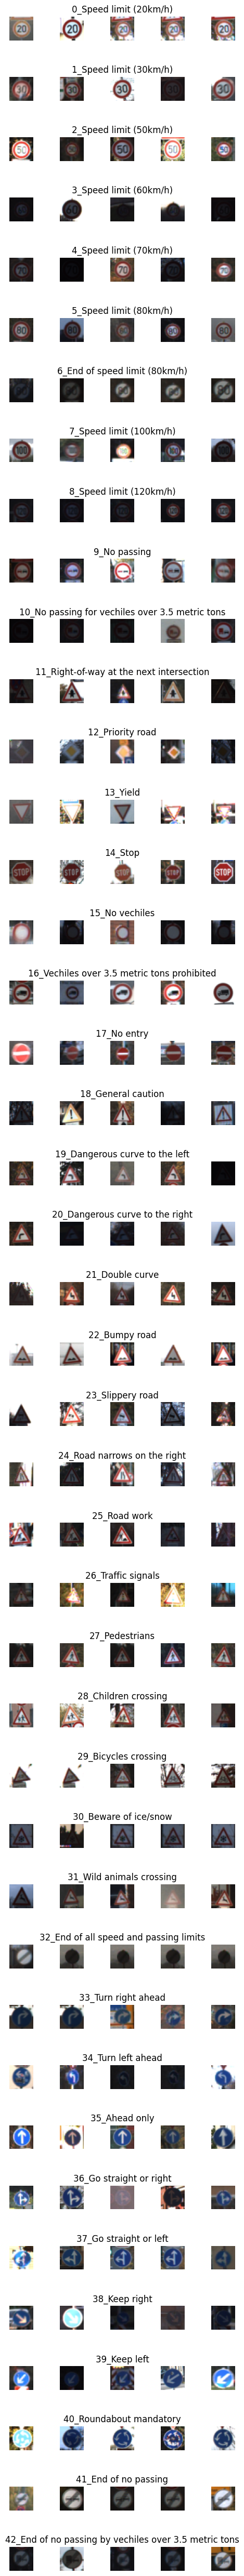

In [5]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
num_of_samples = []
cols = 5
num_classes = 43
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected)-1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "_" + row["SignName"])
            num_of_samples.append(len(x_selected))

In [6]:
def grayscale(img):
    if len(img.shape) == 3:  # Check if the image is not already grayscale
        image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        image = img  # If already grayscale, no need to convert
    plt.axis('off')
    return image

(32, 32)


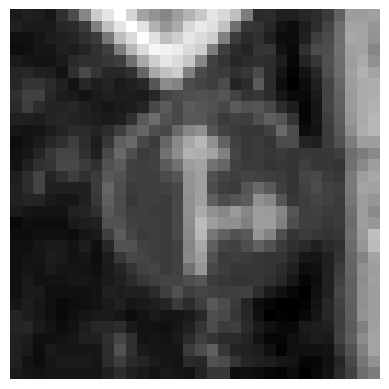

In [7]:
img = grayscale(X_train[1000])
plt.imshow(img, cmap = 'gray')
print(img.shape)

In [8]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

In [9]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

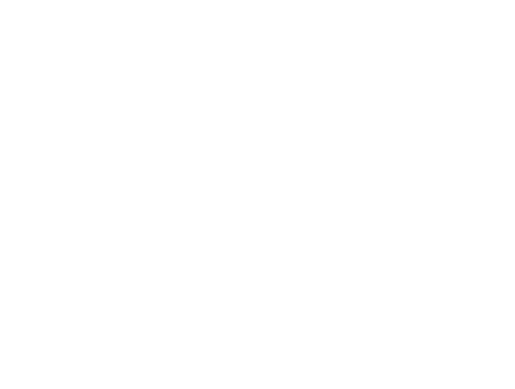

In [10]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(32, 32)


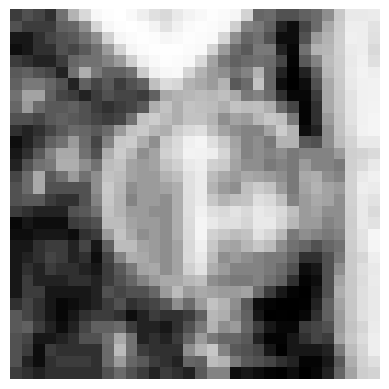

In [11]:
img = equalize(img)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
print(img.shape)

In [12]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range = 0.1,
                  height_shift_range = 0.1,
                   zoom_range = 0.2,
                  shear_range = 0.1,
                  rotation_range = 10)

datagen.fit(X_train)

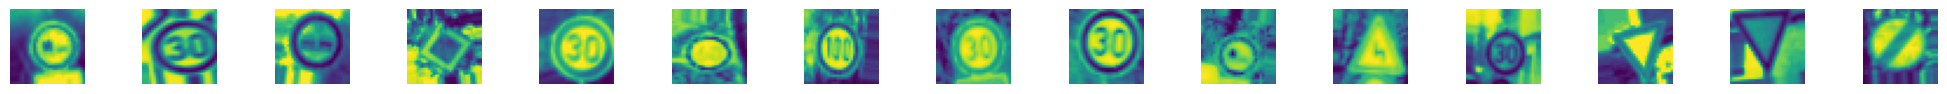

In [14]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize = (20, 5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')

In [15]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [18]:

def neural_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model =neural_model()
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

In [19]:
steps_per_epoch = len(X_train) // 50

# Adjust steps per epoch if there are remaining samples
if len(X_train) % 50 != 0:
    steps_per_epoch += 1

print(steps_per_epoch)

696


In [20]:
history = model.fit(X_train, y_train, batch_size=50, epochs=10, steps_per_epoch=steps_per_epoch,validation_data=(X_val, y_val), shuffle=True)


Epoch 1/10
696/696 [==============================] - 7s 8ms/step - loss: 0.7890 - accuracy: 0.7781 - val_loss: 0.1749 - val_accuracy: 0.9492
Epoch 2/10
696/696 [==============================] - 5s 7ms/step - loss: 0.1261 - accuracy: 0.9617 - val_loss: 0.1117 - val_accuracy: 0.9651
Epoch 3/10
696/696 [==============================] - 5s 7ms/step - loss: 0.0813 - accuracy: 0.9746 - val_loss: 0.1106 - val_accuracy: 0.9660
Epoch 4/10
696/696 [==============================] - 5s 7ms/step - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.0883 - val_accuracy: 0.9776
Epoch 5/10
696/696 [==============================] - 5s 7ms/step - loss: 0.0476 - accuracy: 0.9845 - val_loss: 0.0945 - val_accuracy: 0.9780
Epoch 6/10
696/696 [==============================] - 5s 7ms/step - loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.1112 - val_accuracy: 0.9717
Epoch 7/10
696/696 [==============================] - 5s 8ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0734 - val_accuracy: 0.9805
Epoch 

In [21]:
score = model.evaluate(X_test, y_test, verbose = 1)
print('Test Score', score[0])
print('Test Accuracy', score[1])

395/395 [==============================] - 2s 4ms/step - loss: 0.2615 - accuracy: 0.9468
Test Score 0.2614579498767853
Test Accuracy 0.9467933773994446


In [29]:
from art.estimators.classification import TensorFlowV2Classifier

loss_object = tf.keras.losses.CategoricalCrossentropy()
classifier = TensorFlowV2Classifier(
    clip_values=(0, 1),
    model=model,
    nb_classes=43,
    input_shape=(32, 32, 1),  # Change this to match your model's input shape
    loss_object=loss_object,
)

## Patch Attack

In [64]:
from art.attacks.evasion import AdversarialPatchTensorFlowV2

attack = AdversarialPatchTensorFlowV2(classifier, rotation_max=22.5, scale_min=0.1, scale_max=1.0, learning_rate=5.0, max_iter=1, batch_size=100, optimizer='Adam', targeted=False)


In [65]:
test_images_adv = attack.generate(x=X_test)


Adversarial Patch TensorFlow v2: 100%|██████████| 1/1 [00:17<00:00, 17.94s/it]


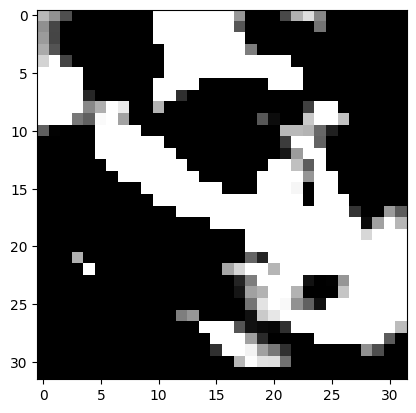

In [68]:
# show image
plt.imshow(test_images_adv[0], cmap='gray')

In [21]:
# n = 10000
# y_pred = classifier.predict(X_test[:n])
# accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test[:n], axis=1))
# print("Accuracy on first %i benign test samples: %f" % (n, accuracy))

Accuracy on first 10000 benign test samples: 0.959600


In [20]:

# from art.attacks.evasion import ProjectedGradientDescent

# attack = ProjectedGradientDescent(classifier, eps=0.3, eps_step=0.01, max_iter=40, targeted=False, 
#                                   num_random_init=True) 

Accuracy on first 10000 adversarial test samples: 0.000000


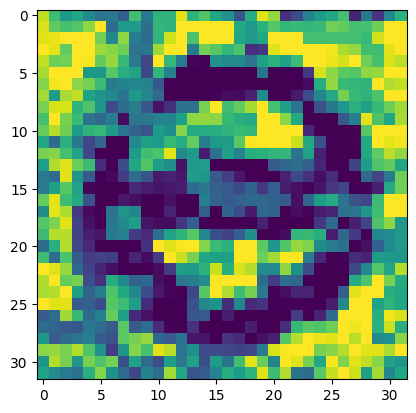

: 

In [26]:
# n = 10000
# X_test_adv = attack.generate(X_test[:n], y=y_test[:n])
# y_adv_pred = classifier.predict(X_test_adv)
# accuracy = np.mean(np.argmax(y_adv_pred, axis=1) == np.argmax(y_test[:n], axis=1))
# print("Accuracy on first %i adversarial test samples: %f" % (n, accuracy))
# # print the first adversarial example
# plt.imshow(X_test_adv[0].reshape(32, 32))